# Community detection

In this notebook we will use a well known library for graph analysis, which includes also algorithm for community detection. The aim is to become familiar with these type of tools, so that to be able to combine them when solving a problem.

The (Python) library is called NetworkX: information about such a library can be found at:

https://networkx.org/

The detailed documentation, including a tutorial and the reference tot he different algorithms and fucntions, can be found at:

https://networkx.org/documentation/stable/reference/index.html

The library can be installed using pip:

```python
pip install networkx
```

## Basic notions

NetworkX handles graphs that are undirected or directed, and the type is implicitly declared since we need to use different constructors.

Graphs can be crated starting from a dataset stored in a Python data structure, such as the adjacency list (dictionary, where the key is the node id and the value is a list with the nighbor ids), or the list edges.

To load the data, we use the same fuction defined in the PageRank notebook.

In [20]:
# Relabel the identifier to be sure they ar in order from zero to N (same as Page Rank)
def load_data(filename):
    input_lines = []
    raw_lines = open(filename, 'r').read().splitlines()
    num_nodes = 0
    nodes = {}
    for line in raw_lines:
        line_content = line.split()
        from_id = int(line_content[0])
        to_id = int(line_content[1])
        if from_id not in nodes:
            nodes[from_id] = num_nodes
            num_nodes += 1
        if to_id not in nodes:
            nodes[to_id] = num_nodes
            num_nodes += 1
        input_lines.append([nodes[from_id], nodes[to_id]])
    return input_lines, num_nodes

The input file containing a toy example is called "5-toy_example.txt".

Let's load our dataset, and create the graphs:

In [21]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import modularity # to understand what is the best level of graph division

input_file = "./5-toy_example.txt"

input_edges, num_nodes = load_data(input_file) # list of edge, identifiers of the nodes -> expected by Networkx

# We create an undirected graph from the dataset
toy_graph = nx.Graph(input_edges)

And we draw it (in case of a warning, re-run the cell):

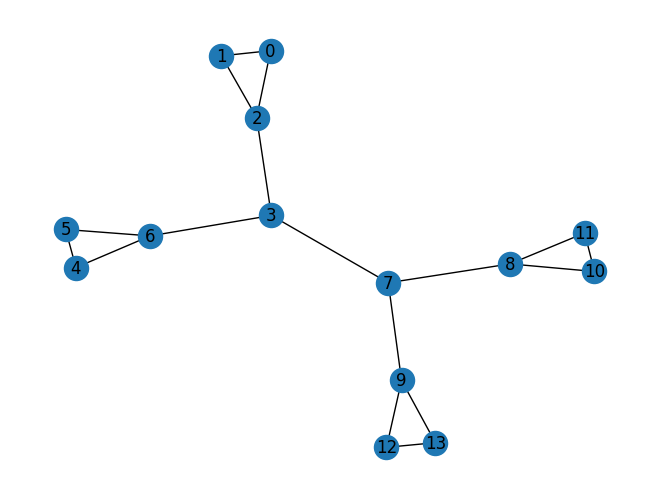

In [22]:
nx.draw(toy_graph, with_labels=True)

We can also create a directed graph from the same dataset (note the link between node 3 and 7):

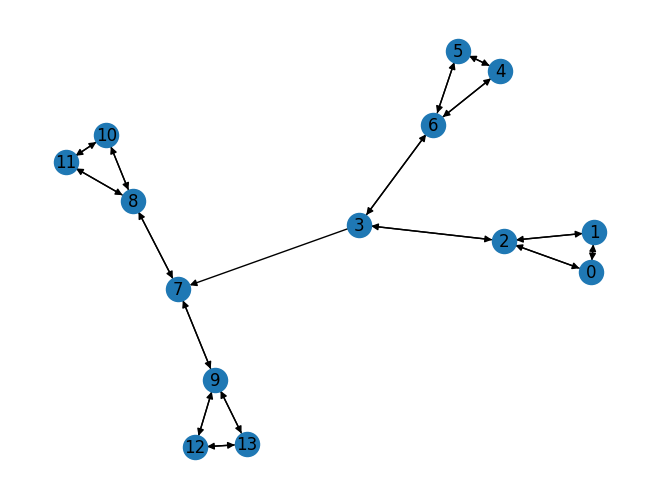

In [23]:
toy_graph_dir = nx.DiGraph(input_edges)
nx.draw(toy_graph_dir, with_labels=True)

Take your time to explore the available algorithms and functions offered by the NetworkX library at: 

https://networkx.org/documentation/stable/reference/functions.html

https://networkx.org/documentation/stable/reference/algorithms/index.html

For instance, given a graph $G$, the function ```degree_histogram(G)``` provides the empirical degree distribution. Given a source node A, the algorithm ```shortest_path(G, A)``` computes the shortest path from A to any other nodes $\in G$.

### Question  Q1
<div class="alert alert-info">
One of the avilable algorithms (see "Link Analysis") is PageRank. Consider the graph provided in the PageRank lab ("4-email-Eu-core.txt"), compute the PageRank with the NetworkX library and compare the results with the implementation done in the previous lab.
</div>

In [24]:
# your answer

## Finding communities

We have already imported the implmenetation of the Girvan-Newman algorithm, so we can obtain the communities with a simple call:

In [25]:
communities = list(girvan_newman(toy_graph)) # girvan_newman is an alg, to which you have to pass a graph.
                                             # Its output is an iterator, an object 

# Print the communities at each level
lev = 0
for comm in communities:
    print("level", lev, ":", comm)
    lev += 1

level 0 : ({0, 1, 2, 3, 4, 5, 6}, {7, 8, 9, 10, 11, 12, 13})
level 1 : ({0, 1, 2}, {3, 4, 5, 6}, {7, 8, 9, 10, 11, 12, 13})
level 2 : ({0, 1, 2}, {3, 4, 5, 6}, {9, 12, 13, 7}, {8, 10, 11})
level 3 : ({0, 1, 2}, {3}, {4, 5, 6}, {9, 12, 13, 7}, {8, 10, 11})
level 4 : ({0, 1, 2}, {3}, {4, 5, 6}, {7}, {8, 10, 11}, {9, 12, 13})
level 5 : ({0}, {1, 2}, {3}, {4, 5, 6}, {7}, {8, 10, 11}, {9, 12, 13})
level 6 : ({0}, {1}, {2}, {3}, {4, 5, 6}, {7}, {8, 10, 11}, {9, 12, 13})
level 7 : ({0}, {1}, {2}, {3}, {4}, {5, 6}, {7}, {8, 10, 11}, {9, 12, 13})
level 8 : ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 10, 11}, {9, 12, 13})
level 9 : ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9, 12, 13}, {10, 11})
level 10 : ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10, 11}, {12, 13})
level 11 : ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12, 13})
level 12 : ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13})


Within each element () there is the group of nodes in each community {}: level 0 has 2 communities, for example.
At each iteration, an edge is removed (alg stop when there are no more edges)

Let's visualize the communities at two different levels. In particular, at level 0 (2 communities), level 1 (3 communities) and level 2 (4 communities).

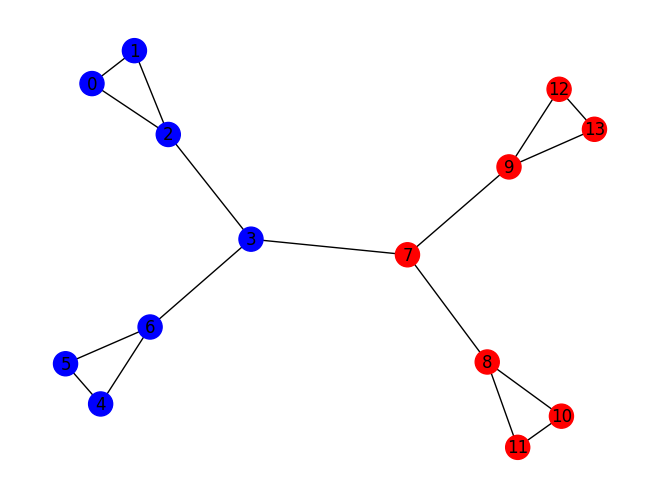

In [26]:
# Level 0 - there are 2 communities
color_map = ['red']*len(toy_graph.nodes) # red for all the nodes
for node in communities[0][0]: # change to blue for the nodes in the first community
    color_map[node] = 'blue'
    
nx.draw(toy_graph, node_color=color_map, with_labels=True) # assign to each node a color according to a colormap (same size as number of nodes)

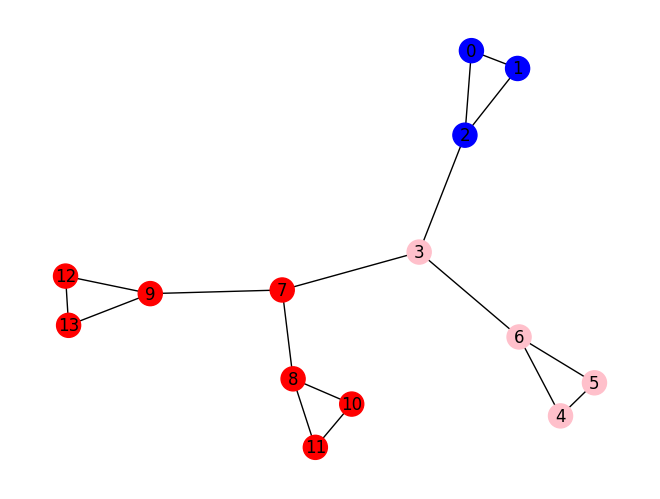

In [27]:
# Level 1 - there are 3 communities
color_map = ['red']*len(toy_graph.nodes)
for node in communities[1][0]: # second community
    color_map[node] = 'blue'
for node in communities[1][1]: # third community
    color_map[node] = 'pink'
    
nx.draw(toy_graph, node_color=color_map, with_labels=True)

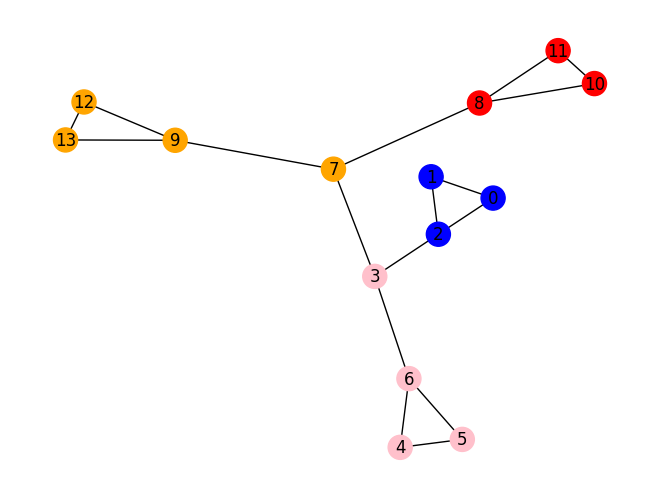

In [28]:
# level 2 - there are 4 communities
color_map = ['red']*len(toy_graph.nodes)
for node in communities[2][0]:
    color_map[node] = 'blue'
for node in communities[2][1]:
    color_map[node] = 'pink'
for node in communities[2][2]:
    color_map[node] = 'orange'
    
nx.draw(toy_graph, node_color=color_map, with_labels=True)

To determine the best division into communities, we use the concept of "modularity", which is computed by the function we imported -- it takes as input the graph and the groups into which is divided and output the modularity for that set of groups.

level 0 : 0.4411764705882353
level 1 : 0.5034602076124568
level 2 : 0.5657439446366782
level 3 : 0.5432525951557093
level 4 : 0.5207612456747405
level 5 : 0.4204152249134948
level 6 : 0.3719723183391004
level 7 : 0.27162629757785467
level 8 : 0.2231833910034602
level 9 : 0.12629757785467127
level 10 : 0.02941176470588234
level 11 : -0.02249134948096887
level 12 : -0.07439446366782007


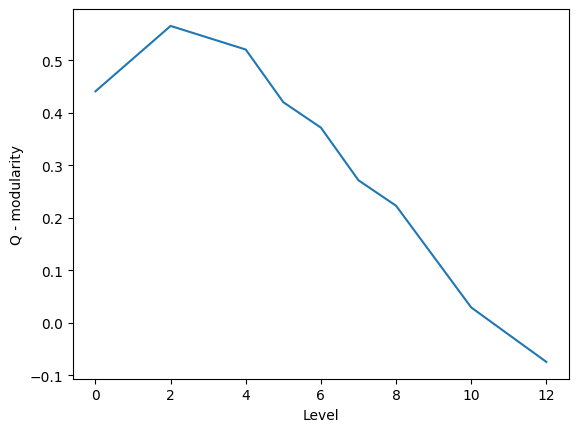

In [29]:
Q_modularity = []
for groups in communities:
    Q_modularity.append(modularity(toy_graph, groups))

# Print the modularity at each level
for i in range(len(Q_modularity)):
    print("level", i, ":", Q_modularity[i])

# Plot it
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(communities)), Q_modularity)
plt.xlabel('Level')
plt.ylabel('Q - modularity')
plt.show()

Our maximum modularity is found at level 2.

### Question  Q2
<div class="alert alert-info">
Apply the methodology described above to a more complex graph, such as "5-large_graph.txt"

The (undirected) graph contains 200 nodes and 755 edges, and the computation may take a while.
</div>

In [30]:
# your answer

### A counter-example

Not all graphs have communities, so we should be able to identify also this case. 

In particular:
- The modularity does not show a clear peak;
- The size of the communities are heterogeneous (large clusters, and very small ones).

Let's see an example with a randomly generated Watts–Strogatz small-world graph -- see https://networkx.org/documentation/stable/reference/generators.html (-> random generated means it's rare to have communities)

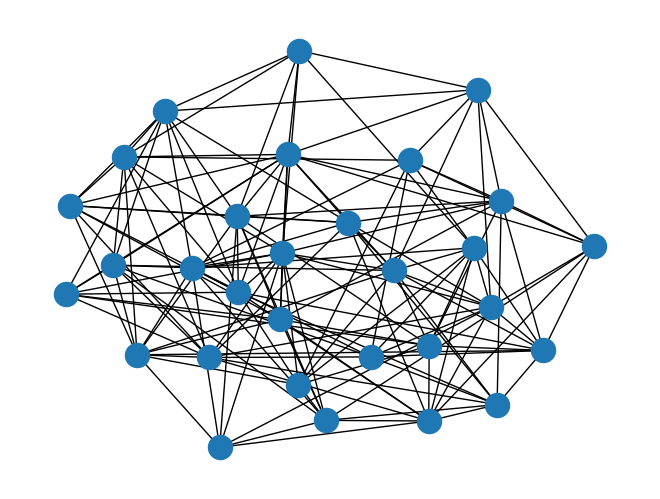

In [31]:
# Create the graph
ws_graph = nx.connected_watts_strogatz_graph(30, 10, 0.8, seed=46378216) # generate graph following the watts strogatz model
nx.draw(ws_graph)


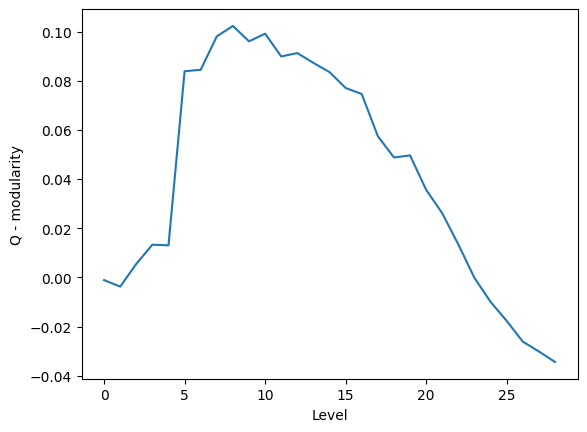

In [32]:
# compute the communities
communities = list(girvan_newman(ws_graph))

# compute the modularity
Q_modularity = []
for groups in communities:
    Q_modularity.append(modularity(ws_graph, groups))

# plot the modularity graph
plt.plot(np.arange(len(communities)), Q_modularity)
plt.xlabel('Level')
plt.ylabel('Q - modularity')
plt.show()


The modularity kind of find a maximum value, but it is not very clear!

If we look at the communities at level 8, we will see a lot of one-node communities:

In [33]:
print(communities[8])

({0}, {1, 2, 3, 7, 8, 9, 11, 13, 14, 17, 20, 21, 22, 24, 25, 26, 29}, {4, 5, 12, 19, 23}, {6}, {10}, {15}, {16}, {18}, {27}, {28})


## Open problem

The aim of this last section is to analyze a problem with the tools seen so far. In particular, let's consider the Movielens dataset analyzed when we discussed the recommendation systems. The question is:

<div class="alert alert-info">
Can movies be clustered into groups? If so, do the movies in the same group share some common characteristics?
</div>

We do not know if we will obtain an answer to our questions, but this is part of the exploratory analysis of a dataset.

The plan would be:
1. Find a way to represent movies such that we can run a clustering algorithm;
2. Run the clustering and check if there are groups;
3. Analyze the movies within each group.

We may be tempted to use *k-means* as clustering algorithm. This means that we need to represent each movie in a $d-$dimensional space (i.e., an *embedding*). But right now we do not have any tool to do that. 

Instead, we could represent the movies with an **undirected graph**. Nodes are movies, and edges represent the similarity, i.e., there is an edge between movie $i$ and $j$ if the similarity between $i$ and $j$ is above some threshold. Therefore, we need to compute the item-item similarities amonge movies, define a threshold, and build our graph.

At this point, we can analyze the graph to detect if there are communities (movies that are more similar within the group), and analyze such communities.

Additional notes:
- The community detection algorithm may take up to 10 hours to analyze graphs with 1000 nodes: when building the graphs, consider only the movies with average rating above some threshold (and choose the threshold to have at most 1000 movies to work with)
- On the Movielens website it is possibile to find additional files (associated to the dataset) that contains information about the movie title, genres and user assigned tags: the analysis of the movies of each cluster should consider these informations.



In [34]:
# your answer